# Exam 1
# MSBA 207
# October 2023

<pre>You must sign this Honor Code Statement before taking the Exam:  

I, tanveer_, agree to neither give nor receive any help on this exam from any other student or person. I understand that providing answers to questions on this exam to any other student or person is an academic misconduct violation as is taking or receiving answers to questions on this exam from any other student or person. I understand that use of any source or communication via the internet or network (including discord message, text message, email, online search, ChatGPT) on this exam is an academic misconduct violation. It is important to me to be a person of integrity and that means that ALL ANSWERS on this exam are my answers. I understand any academic misconduct violation will be dealt with following Academic Honesty Policy and Procedure. 

Signed _________________tanveer b_________________ (Type your name here as your signature) </pre>

Answer the following questions based on the lectures, textbooks, and code provided by Prof. Min Li for the course, not any other source such as the Internet or other people.

The dataset framingham.csv is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict the patient risk of coronary heart disease (CHD) in 10 years.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Save this Jupyter notebook (.ipynb) file including your Python code, output, and answers ("Markdown" format) and submit it in Canvas. Also submit the R code and results (in Word, pdf, or R markdown Knit to html) in canvas. The data dictionary is provided below:

<pre>coronary heart disease
• Sex: male or female (Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

• TenYearCHD: coronary heart disease in 10 years (binary: “1”, means “Yes”, “0” means “No”)
</pre>

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
import math

In [2]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('C:\\Users\\tanve\\Documents\\206\\dmba\\')
# DATA = Path('C:/Users/user/data/')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

In [3]:
df = pd.read_csv(DATA / 'framingham.csv')

In [4]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

df.info() shows many missing (null) values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Replace the missing values by the mean.

In [8]:
df = df.fillna(df.mean().round())

In [9]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.005896,0.029245,0.005896,0.310613,0.025708,236.703066,132.354599,82.897759,25.801693,75.879009,81.966981,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327533,22.033300,11.910394,4.070708,12.023930,22.831751,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## (1) What is the proportion of patients with 10-year risk of future coronary heart disease (CHD) in the data?

In [10]:
len(df[df["TenYearCHD"] == 1])/len(df)

0.15188679245283018

## (2) Partition the data into training (80%) and validation (20%) sets.

In [11]:
train_df, valid_df = train_test_split(df, test_size=0.8, random_state=1)

## (3) Fit logistic regression to the training data using <i>sm.glm</i> in statsmodels. Include all of the features (predictors) as input in logistic regression.

In [12]:
outcome = "TenYearCHD"
predictors = df.drop(columns=outcome).columns

In [13]:
train_X_sm = sm.add_constant(train_df[predictors], prepend=True)
logit_reg_sm = sm.GLM(train_df[outcome], train_X_sm, family=sm.families.Binomial())
logit_result_sm = logit_reg_sm.fit()
logit_result_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                  848
Model:                            GLM   Df Residuals:                      832
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -328.95
Date:                Mon, 23 Oct 2023   Deviance:                       657.89
Time:                        20:43:40   Pearson chi2:                     808.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.07778
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.5052      1.453     -4.476      0.000      -9.354      -3.657
male                0.6897      0.217      3.175      0.001       0.264       1.115
age                 0.0475      0.013      3.548      0.000       0.021       0.074
education          -0.0798      0.099     -0.803      0.422      -0.275       0.115
currentSmoker       0.1916      0.303      0.632      0.528      -0.403       0.786
cigsPerDay          0.0027      0.012      0.215      0.830      -0.022       0.027
BPMeds              0.9841      0.489      2.014      0.044       0.026       1.942
prevalentStroke    -0.4708      1.210     -0.389      0.697      -2.843       1.902
prevalentHyp       -0.0110      0.299     -0.037      0.971      -0.597       0.575
diabetes            0.9076      0.674      1.346      0.178      -0.414       2.229
totChol             0.0037      0.002      1.675      0.094      -0.001       0.008
sysBP               0.0178      0.008      2.219      0.026       0.002       0.033
diaBP              -0.0181      0.014     -1.309      0.190      -0.045       0.009
BMI                 0.0080      0.028      0.280      0.779      -0.048       0.064
heartRate           0.0002      0.008      0.022      0.982      -0.016       0.016
glucose            -0.0002      0.006     -0.038      0.970      -0.012       0.012
===================================================================================
"""

## (4) Write the estimated equation that associates the outcome variable with the predictors in three formates (include only the first and last predictor with "..." in between): <br>
### i. The logit as a function of all predictors

-6.5029+0.6899*1+...-0.0002*1

### ii. The odds as a function of all predictors

math.exp(-6.5029+0.6899*1+...-0.0002*1)

### iii. The probability as a function of all predictors

math.exp(-6.5029+0.6899*1+...-0.0002*1)/(1+math.exp(-6.5029+0.6899*1+...-0.0002*1))

## (5) BPMeds represents whether or not the patient was on blood pressure medication.  Quantify the effect of BPMeds on the risk of coronary heart disease in 10 years. Interpret clearly using the results from the logistic regression you just fit.  

In [14]:
#logit_result_sm.summary()
logit_sum = -6.5029+0.6899+0.0475-0.0799+0.1920+0.0027+0.9823-0.4695-0.0108+0.9080+0.0037+0.0178-0.0181+0.0079+0.0002-0.0002
no_bp = logit_sum - 0.9823
no_cig_base = logit_sum - 0.0027

In [15]:
prob_base = math.exp(logit_sum)/(1-math.exp(logit_sum))
prob_no_bp = math.exp(no_bp)/(1-math.exp(no_bp))
prob_base - prob_no_bp

0.009293995572891433

Being on Blood pressure medication increases the probabliity of getting CHD by 0.9293995572891433% 

## (6) Quantify the effect of the number of cigarettes that the person smoked on average in one day on the risk of coronary heart disease in 10 years. Interpret clearly using the results from the logistic regression you just fit.  

In [16]:
#store old difference in prob chnage based on cig use
old_dif = 0
# go a little past the average amount of cigarets 
for i in range(18):
   no_cig = no_cig_base + (0.0027* i) 
   prob_no_cig = math.exp(no_cig)/(1-math.exp(no_cig))
   dif = prob_base - prob_no_cig
   print(dif - old_dif)
   old_dif = dif

4.0429263665372334e-05
-4.0429263665372334e-05
-4.054180495869503e-05
-4.0654668428988586e-05
-4.0767855047495194e-05
-4.088136578864025e-05
-4.099520163007575e-05
-4.1109363552616074e-05
-4.12238525403924e-05
-4.1338669580719134e-05
-4.145381566418582e-05
-4.156929178464157e-05
-4.168509893922624e-05
-4.180123812836528e-05
-4.1917710355787036e-05
-4.2034516628547056e-05
-4.215165795701942e-05
-4.226913535492274e-05


Each subsequent cigarette in a day increases the probability of getting CHD by about 0.004% 

## (7) Compare the overall accuracy based on training and validation data.  Produce the gains and lift charts based on the validation data.  Interpret the gains and lift charts.

In [17]:
valid_X_sm = sm.add_constant(valid_df[predictors], prepend=True)
predictions_valid = logit_result_sm.predict(np.asarray(valid_X_sm, dtype= float))
predictions_nominal_valid = [ 0 if x < 0.5 else 1 for x in predictions_valid]
classificationSummary(valid_df[outcome], predictions_nominal_valid)

Confusion Matrix (Accuracy 0.8496)

       Prediction
Actual    0    1
     0 2856   22
     1  488   26


In [18]:
predictions_train = logit_result_sm.predict(np.asarray(train_X_sm, dtype= float))
predictions_nominal_train = [ 0 if x < 0.5 else 1 for x in predictions_train]
classificationSummary(train_df[outcome], predictions_nominal_train)

Confusion Matrix (Accuracy 0.8479)

       Prediction
Actual   0   1
     0 712   6
     1 123   7


In [19]:
logit_full = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_full.fit(train_df[predictors], train_df[outcome])
proba_valid = logit_full.predict_proba(valid_df[predictors])
proba_train = logit_full.predict_proba(train_df[predictors])

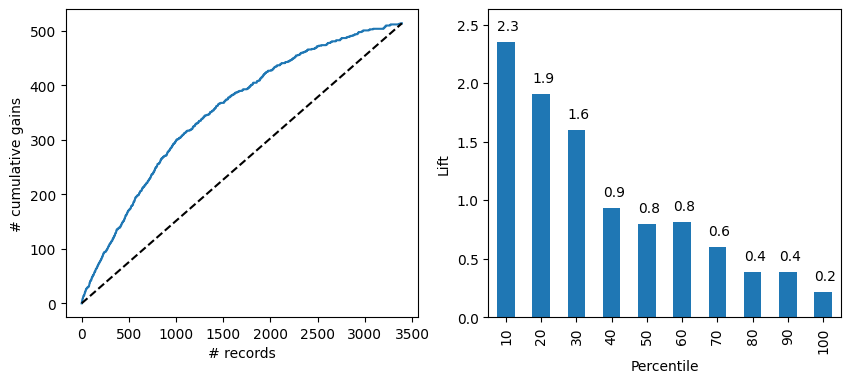

In [20]:
full_result = pd.DataFrame({'actual': valid_df[outcome], 
                            'p(0)': [p[0] for p in proba_valid],
                            'p(1)': [p[1] for p in proba_valid],
                            'predicted': logit_full.predict(valid_df[predictors])})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(full_result.actual, ax=axes[0])
liftChart(full_result.actual, title=False)
plt.show()

the Validation set has a accuracy that is 0.0017 lower than the training set. This small difference lends me to belive that the model is no over fitted. a majority of the results can be found in the first decile which means we have captured the records fairly well and the gains chart reveals our model is performing better than a random guess. 

## (8) Standardize all predictors based on the training data. Try an automated feature selection method by using regularization with L1 penalty (<i>lasso</i>) through sklearn method <i>LogisticRegressionCV</i>. Set the number of folds to 10, i.e., cv=10. Include the following options: random_state=1, tol=1e-8, max_iter=10000. Write down the Python code and the output.

In [21]:
logit_reg_L1 = LogisticRegressionCV(penalty="l1", solver='liblinear', cv=10, random_state=1, tol=1e-8, max_iter=10000)
logit_reg_L1.fit(train_df[predictors], train_df[outcome])


LogisticRegressionCV(cv=10, max_iter=10000, penalty='l1', random_state=1,
                     solver='liblinear', tol=1e-08)

In [22]:
print('intercept ', logit_reg_L1.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg_L1.coef_[0]}, index=train_df[predictors].columns).transpose())
print()


intercept  -2.4114212478837076
           male       age  education  currentSmoker  cigsPerDay    BPMeds  \
coeff  0.484282  0.027793  -0.131004            0.0    0.004236  0.435193   

       prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
coeff              0.0      0.287339  0.300973  0.001548  0.019599 -0.032739   

            BMI  heartRate   glucose  
coeff -0.019289  -0.008777  0.000688  



#### Report the value of the penalty parameter C. 

In [23]:
logit_reg_L1.C_

array([0.35938137])

### Convert C to the more common notation lambda used for the lasso (L1) model as during the instructor's lecture and report the value of lambda. 

In [46]:
1/logit_reg_L1.C_

array([2.7825594])

### How many features are automatically selected by <i>lasso</i> L1? List the features that are not selected by <i>lasso</i> L1.

12 are selected. 
the ones that were not selected were:
education, currentSmoker, prevalentStroke, glucose 

### Besides automatic feature selection, what is the main reason for using regularization with L1 penalty (lasso) as explained in the lecture?

It reduces varrience to imporove predictive power.  

## (9) Save the training and validation data from (2) to csv files using .to_csv().  Use R’s glmnet() to fit both lasso (L1) and elastic-net models to the training data. Compare the selected predictors from both to those predictors selected in (d). Make sure you run set.seed(123) once at beginning of your R code every time you run your R code so the results can be reproduced using the same random number generator. Answer the following questions: 

In [24]:
train_df.to_csv(DATA/ "framingham_train.csv", index = False)
valid_df.to_csv(DATA/ "framingham_valid.csv", index = False)

### How many features are automatically selected by lasso L1 using R's glmnet()? List the features that are not selected.

8 were selected. 
the ones that were not selected were:
cigsPerDay, prevalentStroke, prevalentHyp, diaBP, BMI, heartRate, glucose 

### How many features are automatically selected by the elastic-net model using R's glmnet()? List the features that are not selected.

5 were selected. 
the ones that were not selected were:
education, currentSmoker, cigsPerDay, prevalentStroke, prevalentHyp, totalChol, diaBP, BMI, heartRate, glucose 

### What is the chosen value of alpha from the elastic-net model? Is it more lasso (L1) or ridge (L2)? Explain briefly.

the chosen alpha is 0.4, that puts it closer to ridge(l2) which shrinks coefficents togeter with an alpha of 0. 

### (10) (a) Fit a neural network model to the training data. Use grid search to find the optimal number of nodes in the hidden layer. Then train the neural network again with the optimal number of nodes in the hidden layer and find the confusion matrix and accuracy. Use the 'logistic' activation function and solver 'lbfgs'.  Create the gains and lift charts for the training and validation sets. Interpret the meaning (in business terms) of the leftmost bar of the validation decile-wise lift chart.

In [33]:
minMax = MinMaxScaler(feature_range=(0, 1), clip=True)
scaled_train_X = minMax.fit_transform(train_df[predictors])
#scaled_valid_X = minMax.fit_transform(valid_df[predictors])
clf = MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter= 1000)
clf.fit(scaled_train_X, train_df[outcome])

MLPClassifier(activation='logistic', max_iter=1000, random_state=1,
              solver='lbfgs')

In [34]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=1000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(scaled_train_X, train_df[outcome])
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.8466968325791855
Best parameters:  {'hidden_layer_sizes': 1}


In [35]:
clf = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs', random_state=1, max_iter= 1000)
clf.fit(scaled_train_X, train_df[outcome])
classificationSummary(valid_df[outcome], clf.predict(valid_df[predictors]))

Confusion Matrix (Accuracy 0.8485)

       Prediction
Actual    0    1
     0 2878    0
     1  514    0


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [36]:
proba_valid = clf.predict_proba(valid_df[predictors])
proba_train = clf.predict_proba(train_df[predictors])


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


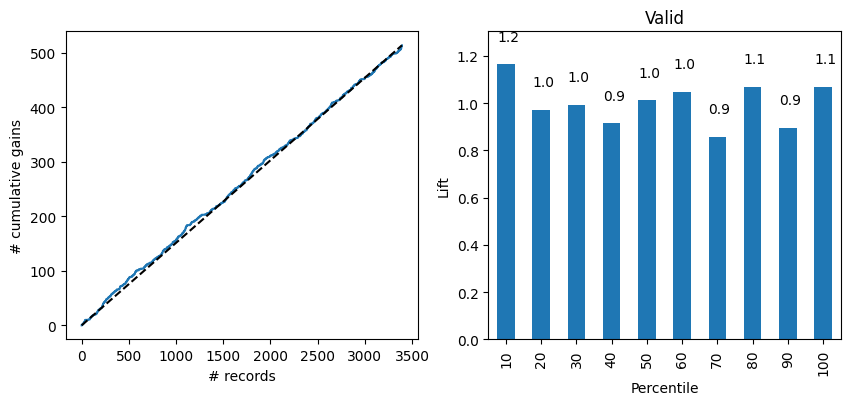

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


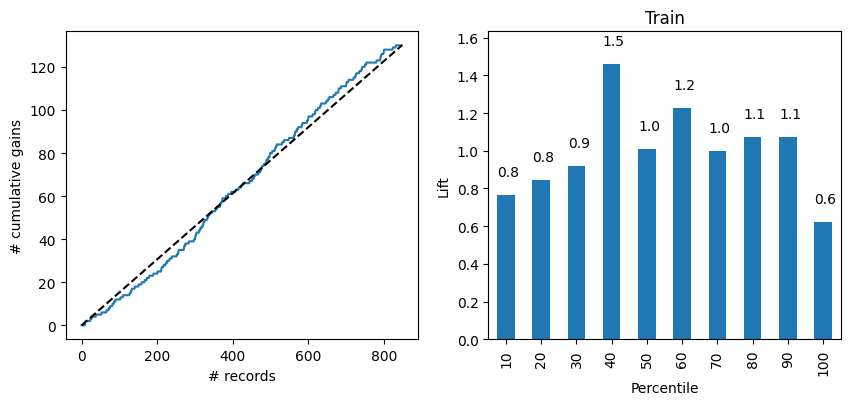

In [44]:
full_result = pd.DataFrame({'actual': valid_df[outcome], 
                            'p(0)': [p[0] for p in proba_valid],
                            'p(1)': [p[1] for p in proba_valid],
                            'predicted': clf.predict(valid_df[predictors])})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(full_result.actual, ax=axes[0])
liftChart(full_result.actual, title= 'Valid')
plt.show()

full_result = pd.DataFrame({'actual': train_df[outcome], 
                            'p(0)': [p[0] for p in proba_train],
                            'p(1)': [p[1] for p in proba_train],
                            'predicted': clf.predict(train_df[predictors])})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(full_result.actual, ax=axes[0])
liftChart(full_result.actual, title='Train')
plt.show()

the leftmost bar of the decile lift chart shows us how value we can get from the top 10% of records. This shows us teh top 10% of patients most likely to have CHD are about 1.2 times as likly to have it. 

### (10) (b) Fit a neural network model to the training data. Use grid search to find the optimal number of nodes in the hidden layer. Then train the neural network again with the optimal number of nodes in the hidden layer and find the confusion matrix and accuracy. Use the 'relu' activation function and solver 'adam'.  Create the gains and lift charts for the training and validation sets. Interpret the meaning (in business terms) of the leftmost bar of the validation decile-wise lift chart.  Compare the results with those in (9) and also discuss which activation function and solver would you use here.

In [38]:
clf = MLPClassifier(activation='relu', solver='adam', random_state=1, max_iter= 1000)
clf.fit(scaled_train_X, train_df[outcome])

c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1000, random_state=1)

In [39]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='relu', solver='adam', random_state=1, max_iter=1000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(scaled_train_X, train_df[outcome])
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.8466968325791855
Best parameters:  {'hidden_layer_sizes': 1}


In [40]:
clf = MLPClassifier(hidden_layer_sizes=(1), activation='relu', solver='adam', random_state=1, max_iter= 1000)
clf.fit(scaled_train_X, train_df[outcome])
classificationSummary(valid_df[outcome], clf.predict(valid_df[predictors]))

Confusion Matrix (Accuracy 0.8485)

       Prediction
Actual    0    1
     0 2878    0
     1  514    0


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


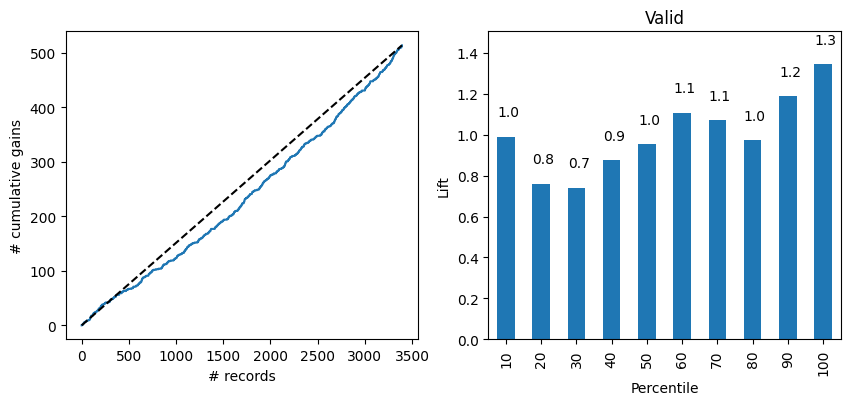

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


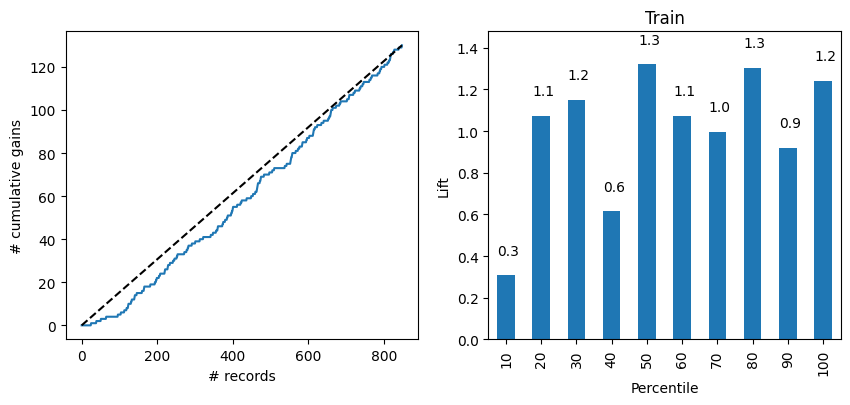

In [45]:
proba_valid = clf.predict_proba(valid_df[predictors])
proba_train = clf.predict_proba(train_df[predictors])

full_result = pd.DataFrame({'actual': valid_df[outcome], 
                            'p(0)': [p[0] for p in proba_valid],
                            'p(1)': [p[1] for p in proba_valid],
                            'predicted': clf.predict(valid_df[predictors])})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(full_result.actual, ax=axes[0])
liftChart(full_result.actual, title= 'Valid')
plt.show()

full_result = pd.DataFrame({'actual': train_df[outcome], 
                            'p(0)': [p[0] for p in proba_train],
                            'p(1)': [p[1] for p in proba_train],
                            'predicted': clf.predict(train_df[predictors])})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(full_result.actual, ax=axes[0])
liftChart(full_result.actual, title='Train')
plt.show()

This lift chart shows us teh top 10% of people likely to have CHD are 1 times as likly as any other randomly selected person. This seems counter intutive as someone who has a higher probability than 90% of the sample to get CHD should be more likley to get it if the model is useful.  

given the shallow network of depth 1, i would use the lbfgs solver with a logistic activation. both models return the smae level of accuracy and misclassifications. 